In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [5]:
env.step(1)

((17, 10, False), 0, True, {})

In [7]:
[i for i in range(3,-1,-1)]

[3, 2, 1, 0]

In [9]:
a = defaultdict(float)

In [10]:
a[0]

0.0

In [ ]:
env.step

In [17]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for _ in range(num_episodes):
        next_observation = env.reset()
        temp_list = []
        while True:
            observation = next_observation
            action_prob = policy(observation)
            action = np.random.choice([0,1], p=action_prob)
            next_observation, next_reward, done, _ = env.step(action)
            temp_list.append([observation, next_reward])
            if done:
                break
        temp_return = 0
        for j in range(len(temp_list)-1,-1,-1):
            observation, next_reward = temp_list[j]
            temp_return = next_reward + discount_factor * temp_return
            returns_sum[observation] += temp_return
            returns_count[observation] += 1
            
    for observation in returns_sum:
        V[observation] = returns_sum[observation] / returns_count[observation]

    return V

In [15]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

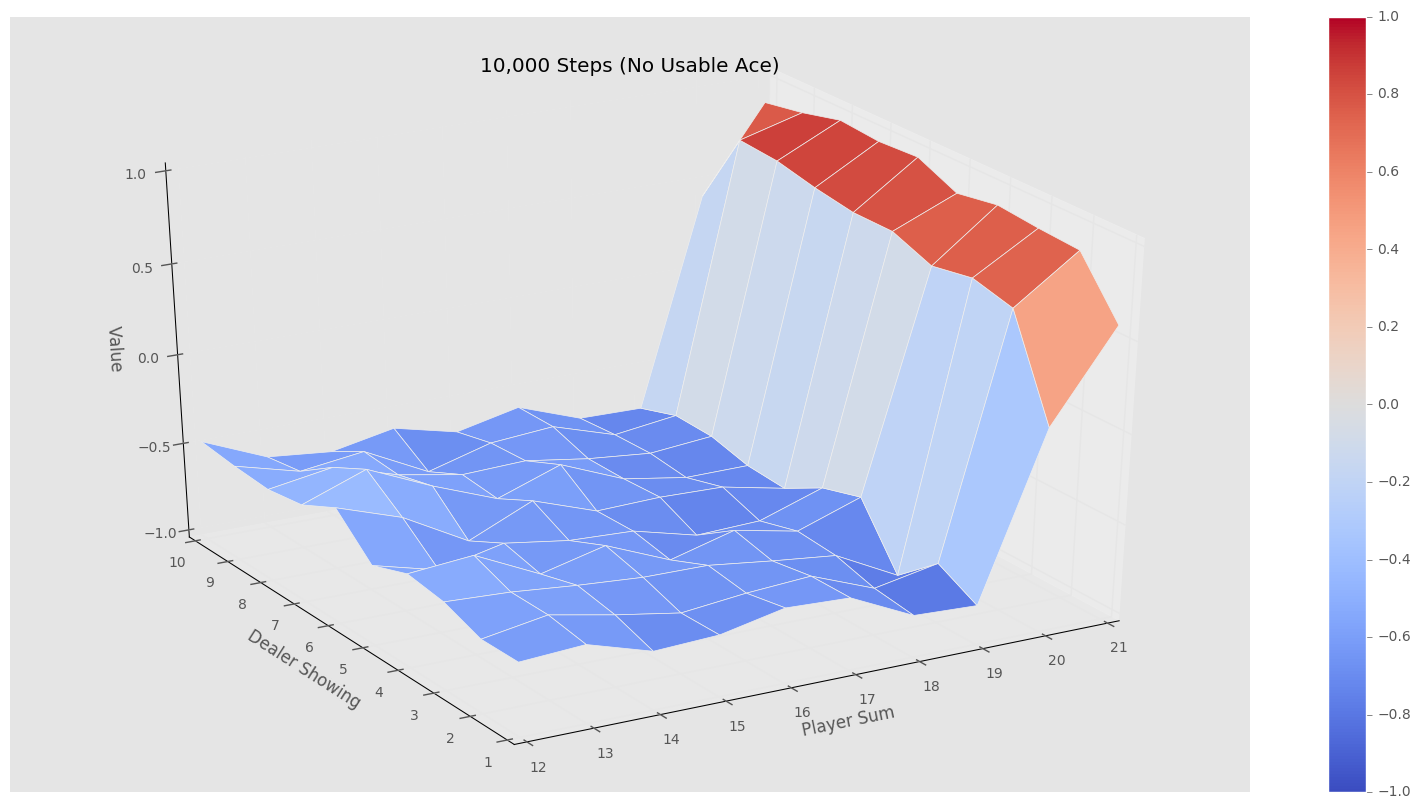

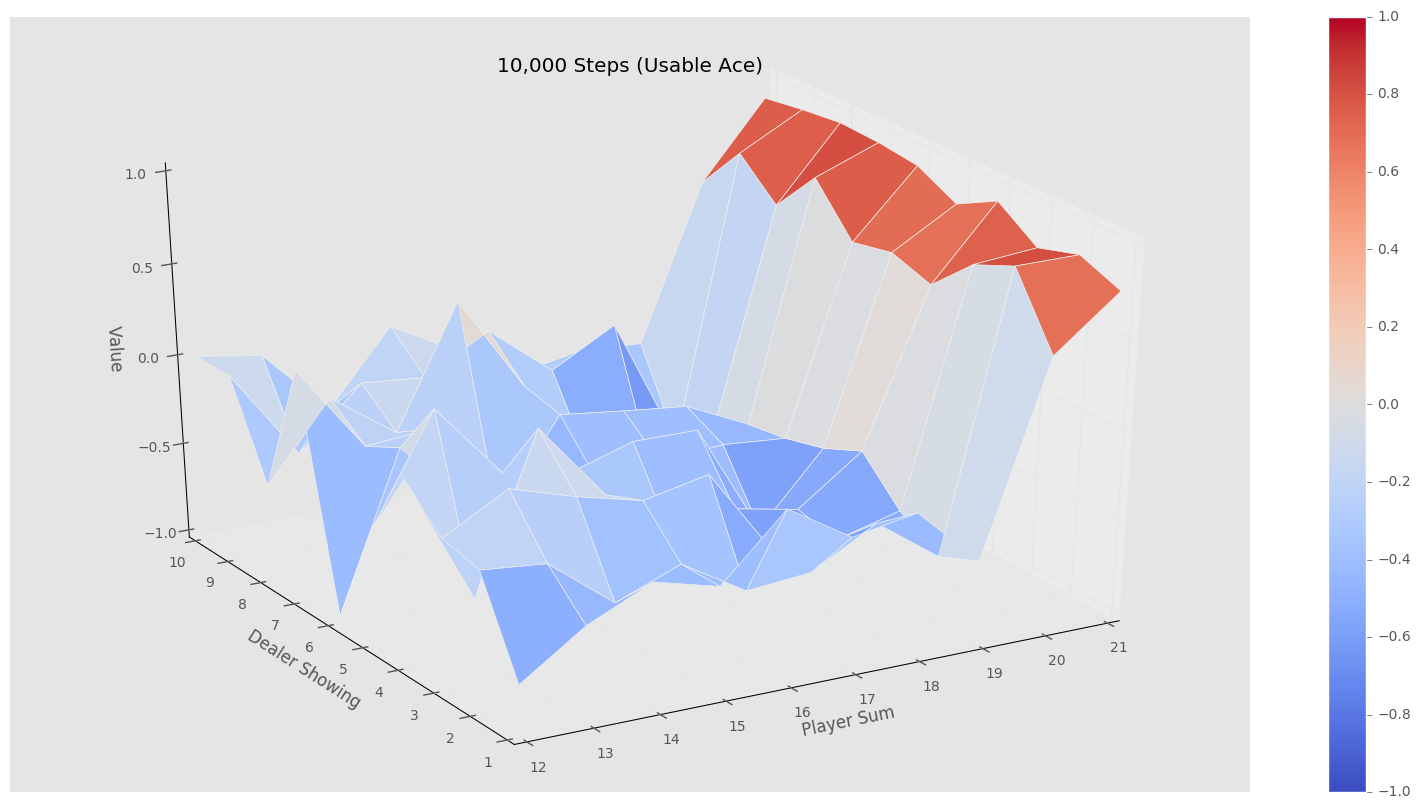

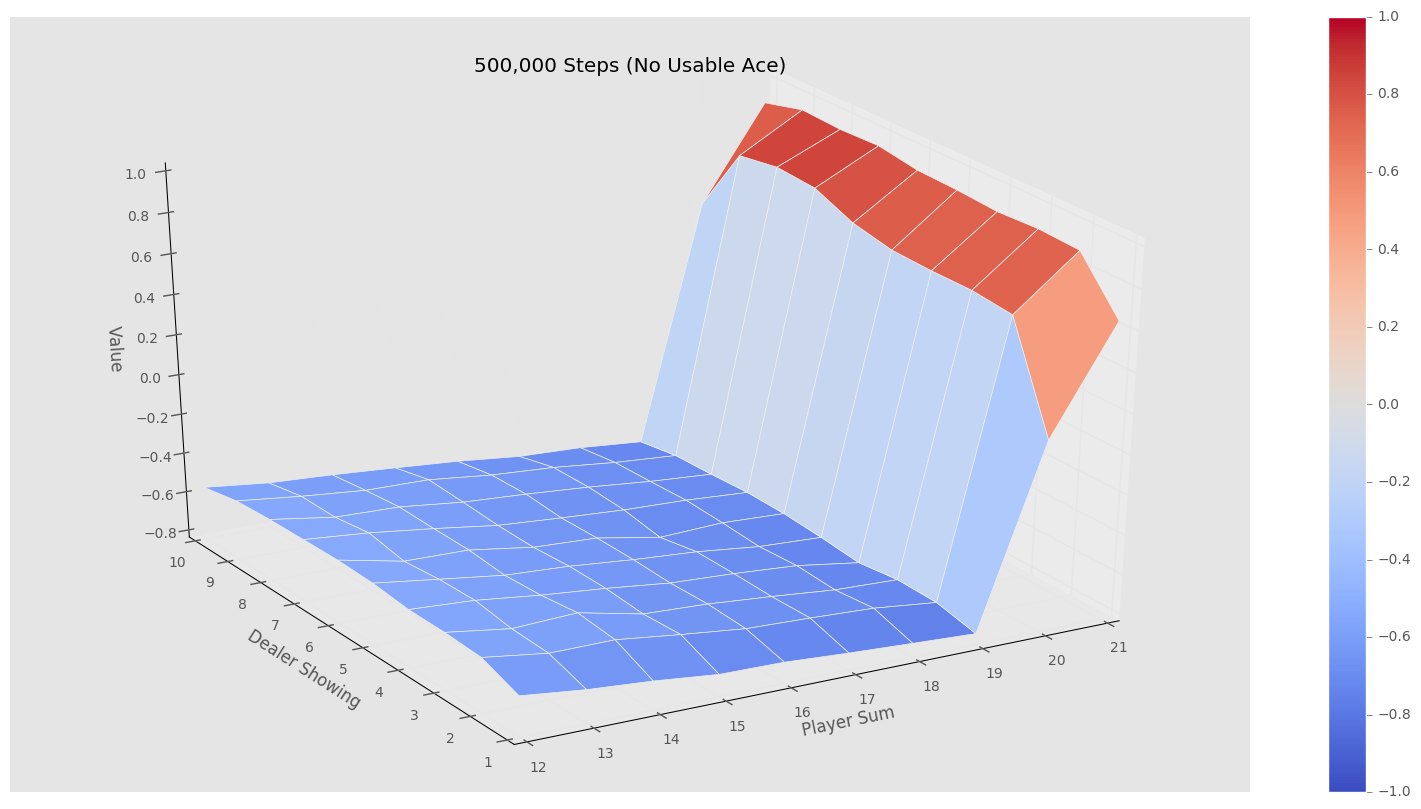

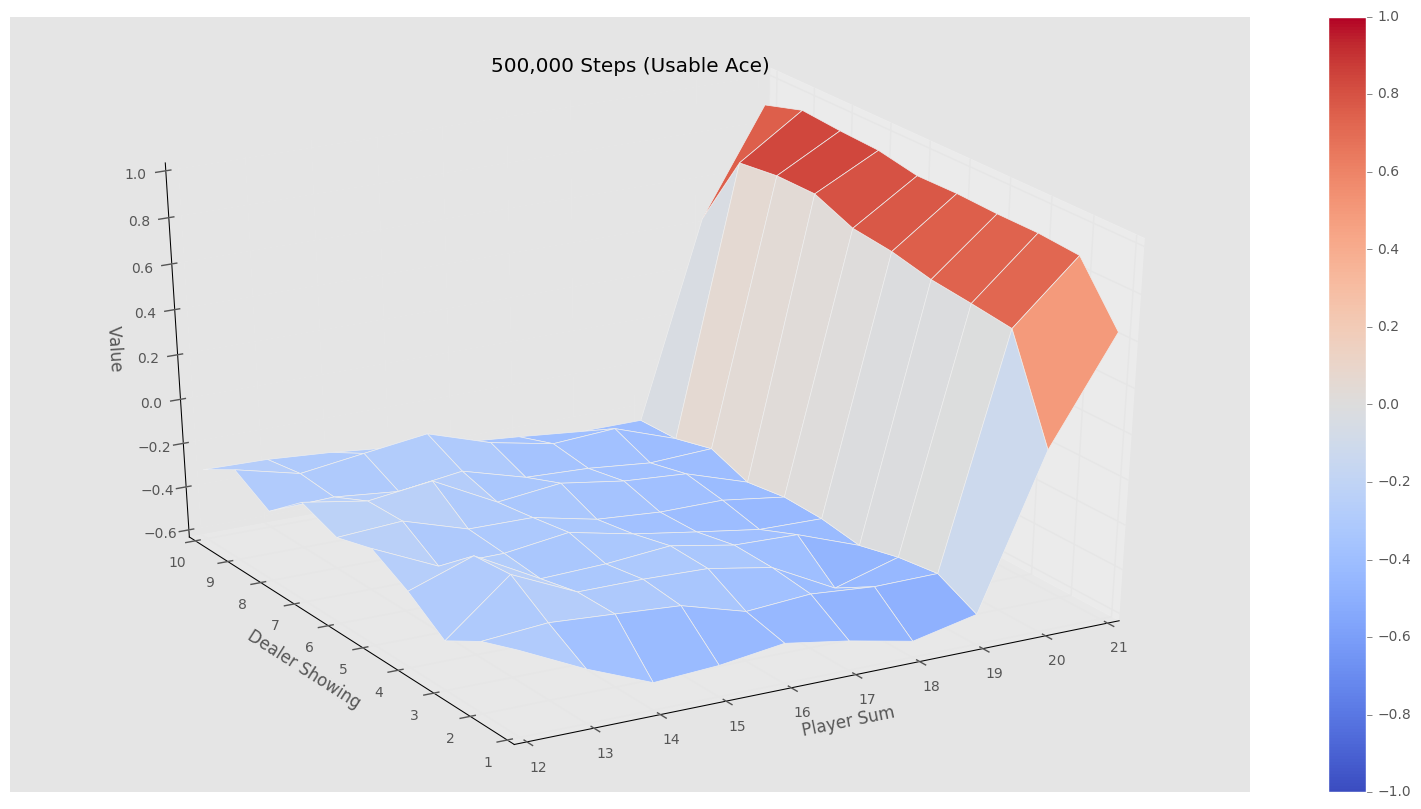

In [18]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")